In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

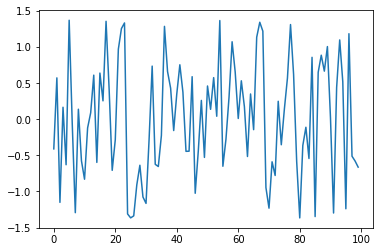

0.00688299760299


In [20]:
#model

y = []
x = np.arange(100,200,1) #EEG data
np.random.shuffle(x)
a = 1
b= 0.5
c= 0.5

for i in x:
    y.append(a*np.sin(i) + b*np.sin(c*i)) #model
plt.plot(y)
plt.show()
print(np.mean(y)) #trying to optimize to get the correct power spec given eeg data


In [36]:
x1 = np.arange(100,200,1)
np.random.shuffle(x1)

x2 = np.arange(100,200,1)
np.random.shuffle(x2)

x3 = np.arange(100,200,1)
np.random.shuffle(x3)

trainData = np.vstack((x1,x2))
trainData = np.vstack((trainData,x3))

trainTarget = np.array([1,2,3]).reshape((3, 1))

In [45]:
def initModel(learn_rate):
    lam = 0.01

#     a = tf.Variable(tf.float32, [None, 1])
#     b = tf.Variable(tf.float32, [None, 1])
#     c = tf.Variable(tf.float32, [None, 1])
    
    a = tf.Variable(tf.zeros(1))
    b = tf.Variable(tf.zeros(1))
    c = tf.Variable(tf.zeros(1))

    X = tf.placeholder(tf.float32, [None, 100])
    y_target = tf.placeholder(tf.float32, [None,1])
    learn_rate=tf.Variable(learn_rate) 
        
    y_predicted = a*tf.sin(X) + b*tf.sin(c*X)
    
    logistic_pred = tf.reduce_mean(y_predicted)
    
    # Error definition
    loss = tf.reduce_mean(tf.losses.mean_squared_error(logits=logistic_pred, labels=y_target))

    # Training mechanism
    optimizer = tf.train.AdamOptimizer(learning_rate = learn_rate)
    train = optimizer.minimize(loss)
    return a, b, X, y_target, logistic_pred, loss, train

In [46]:
def predModel(learn_rate):
    # Variable creation
    y_pred_val = tf.placeholder(tf.float32, [None,1])
    y_target_val = tf.placeholder(tf.float32, [None,1])

    # Error definition
    err_int_val=tf.reduce_mean(tf.losses.mean_squared_error(logits=y_pred_val, labels=y_target_val))
    
    return  y_pred_val, y_target_val

In [47]:
def learn_rate(n, datax, datay):
    a, b, X , y_target, logistic_pred, loss, train = initModel(n)

    # Initialize session
    init = tf.global_variables_initializer()
    sess = tf.InteractiveSession()
    sess.run(init)

    _, err, currentW, currentb, yhat = sess.run([train, err_int, logistic_pred], feed_dict={X: trainData, y_target: trainTarget})


    return err, yhat

In [48]:
err, yhat = learn_rate(0.005, trainData, trainTarget)

TypeError: mean_squared_error() got an unexpected keyword argument 'logits'

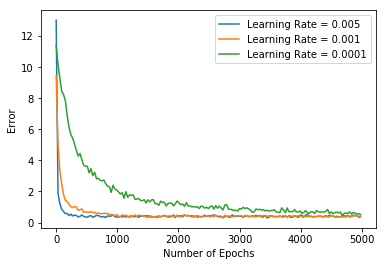

In [100]:
batch_size= 500
one_epoch_size=15000/batch_size

ind_epoch = []
err_05_plot=[]
err_01_plot=[]
err_001_plot=[]

for x in range(0,5001,int(one_epoch_size)):
    ind_epoch.append(x)
    err_05_plot.append(err_005[x])
    err_01_plot.append(err_001[x])
    err_001_plot.append(err_0001[x])

plt.figure() 
plt.xlabel('Number of Epochs')
plt.ylabel('Error')
plt.plot(ind_epoch,err_05_plot,label='Learning Rate = 0.005') 
plt.plot(ind_epoch,err_01_plot,label='Learning Rate = 0.001')
plt.plot(ind_epoch,err_001_plot,label='Learning Rate = 0.0001')
plt.legend(loc='upper right')
plt.show()


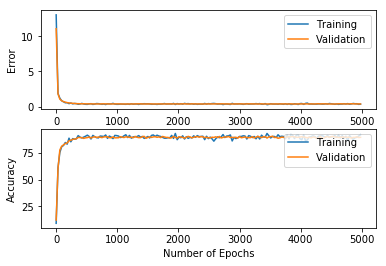

In [101]:
err_05_plot_train=err_05_plot
acc_05_plot_train=[]


for x in range(0,5001,int(one_epoch_size)):
    acc_05_plot_train.append(a005[x])

    
    ##valid set now


verr_05_plot_valid=[]
acc_05_plot_valid=[]


for x in range(0,5001,int(one_epoch_size)):
    verr_05_plot_valid.append(verr_005[x])
    acc_05_plot_valid.append(va005[x])



plt.figure(1)
plt.subplot(211)
#plt.figure() 
plt.xlabel('Number of Epochs')
plt.ylabel('Error')
plt.plot(ind_epoch,err_05_plot_train,label='Training') 
plt.plot(ind_epoch,verr_05_plot_valid,label='Validation') 
plt.legend(loc='upper right')

plt.subplot(212)
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.plot(ind_epoch,acc_05_plot_train,label='Training') 
plt.plot(ind_epoch,acc_05_plot_valid,label='Validation') 
plt.legend(loc='upper right')

plt.show()


In [ ]:
verr_05_plot_valid

In [106]:
terr_005, tverr_005, ta005, tva005 = learn_rate(0.005, trainData, trainTarget, testData, testTarget)

In [72]:
tva005[5000] #best test accuraacy

87.799999999999997